## Bike Sharing Assignment Linear Regression

In [3]:
#importing the requirwd libraries

import pandas as pd
import numpy as np

## For Visualization and EDA
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

## Reading the data

In [4]:
df = pd.read_csv('day.csv',parse_dates=['dteday'])

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Observing the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
# Observing the statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.shape

(730, 16)

## Data Cleaning and Quality Check

__Missing value check__

In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

___The dataset does not have any missing value for any column.___

__Duplicate record checking in dataset__

In [10]:
bike_duplicate = df.copy()
# Check for duplicates and dropping the duplicate row if present
bike_duplicate.drop_duplicates(subset=None, inplace=True)

In [11]:
bike_duplicate.shape

(730, 16)

__The dataset does not have any duplicate rows as shape remains same after dropping duplicate rows.__

## Data Preparation

__To identify the categorical variables__

In [12]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

It seems there are seven categorical variable. Let us analyze whether their values, really need to be categorical. so as to decide whether need to create dummy variables.

In [13]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


__As stateted in problem and after analyzing the data dictionary, it seems that season and weathersit nummeric values 
does not represent any order, so string representation will be better informative for these columns.__

__Also mnth and weekday column currently represented as range of numbers but these are not ordinal column, hence converting to string representation for better interpretation.__

In [14]:
## String representation for season column

In [15]:
# Define a function to map the categorical variables to it's string representation
def season_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Apply the function to the 'season' column of the dataframe
df[['season']] = df[['season']].apply(season_map)

# Print the DataFrame
print(df)


     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2018-01-01  spring   0     1        0        1           1   
1          2 2018-02-01  spring   0     1        0        2           1   
2          3 2018-03-01  spring   0     1        0        3           1   
3          4 2018-04-01  spring   0     1        0        4           1   
4          5 2018-05-01  spring   0     1        0        5           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
725      726 2019-12-27  spring   1    12        0        5           1   
726      727 2019-12-28  spring   1    12        0        6           0   
727      728 2019-12-29  spring   1    12        0        0           0   
728      729 2019-12-30  spring   1    12        0        1           1   
729      730 2019-12-31  spring   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14

In [16]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
## String representation of weathersit column

In [18]:
# Define a function to map the categorical variables to it's string representation
def weathersit_map(x):
    return x.map({1: 'cloudy', 2: 'mist', 3: 'light rain', 4: 'heavy rain'})

# Apply the function to the 'season' column of the dataframe
df[['weathersit']] = df[['weathersit']].apply(weathersit_map)

# Print the DataFrame
print(df)


     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2018-01-01  spring   0     1        0        1           1   
1          2 2018-02-01  spring   0     1        0        2           1   
2          3 2018-03-01  spring   0     1        0        3           1   
3          4 2018-04-01  spring   0     1        0        4           1   
4          5 2018-05-01  spring   0     1        0        5           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
725      726 2019-12-27  spring   1    12        0        5           1   
726      727 2019-12-28  spring   1    12        0        6           0   
727      728 2019-12-29  spring   1    12        0        0           0   
728      729 2019-12-30  spring   1    12        0        1           1   
729      730 2019-12-31  spring   1    12        0        2           1   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0         mist  14.1

In [19]:
##String representation of mnth column 

In [20]:
# Define a function to map the categorical variables to it's string representation
def mnth_map(x):
    return x.map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 
                  10:'October', 11:'November', 12: 'December'})

# Apply the function to the 'mnth' column of the dataframe
df[['mnth']] = df[['mnth']].apply(mnth_map)

# Print the DataFrame
print(df)


     instant     dteday  season  yr      mnth  holiday  weekday  workingday  \
0          1 2018-01-01  spring   0   January        0        1           1   
1          2 2018-02-01  spring   0   January        0        2           1   
2          3 2018-03-01  spring   0   January        0        3           1   
3          4 2018-04-01  spring   0   January        0        4           1   
4          5 2018-05-01  spring   0   January        0        5           1   
..       ...        ...     ...  ..       ...      ...      ...         ...   
725      726 2019-12-27  spring   1  December        0        5           1   
726      727 2019-12-28  spring   1  December        0        6           0   
727      728 2019-12-29  spring   1  December        0        0           0   
728      729 2019-12-30  spring   1  December        0        1           1   
729      730 2019-12-31  spring   1  December        0        2           1   

    weathersit       temp     atemp      hum  winds

In [21]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,January,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,January,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,January,0,3,1,cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,January,0,4,1,cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,January,0,5,1,cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
## String representation of weekday column

In [23]:
# Define a function to map the categorical variables to it's string representation
def weekday_map(x):
    return x.map({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'})

# Apply the function to the 'season' column of the dataframe
df[['weekday']] = df[['weekday']].apply(weekday_map)

# Print the DataFrame
print(df)


     instant     dteday  season  yr      mnth  holiday    weekday  workingday  \
0          1 2018-01-01  spring   0   January        0     Monday           1   
1          2 2018-02-01  spring   0   January        0    Tuesday           1   
2          3 2018-03-01  spring   0   January        0  Wednesday           1   
3          4 2018-04-01  spring   0   January        0   Thursday           1   
4          5 2018-05-01  spring   0   January        0     Friday           1   
..       ...        ...     ...  ..       ...      ...        ...         ...   
725      726 2019-12-27  spring   1  December        0     Friday           1   
726      727 2019-12-28  spring   1  December        0   Saturday           0   
727      728 2019-12-29  spring   1  December        0        NaN           0   
728      729 2019-12-30  spring   1  December        0     Monday           1   
729      730 2019-12-31  spring   1  December        0    Tuesday           1   

    weathersit       temp  

In [24]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,January,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,January,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,January,0,Wednesday,1,cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,January,0,Thursday,1,cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,January,0,Friday,1,cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


__Removing non-required columns__

Based on the data and the data dictionary, the following coluumns can be removed from dataframe:

instant :  only an index value

dteday : This has the date, Since we already have seperate columns for 'year' and 'month',hence, we can eliminate this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as df_new, so that the original dataset is preserved for any future analysis/validation

In [25]:
df_new = df[['season','yr','mnth','holiday', 'weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]

In [26]:
## Continuous column
cont_cols = ["temp","atemp","hum","windspeed"]

##Categorical column
cat_cols = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

## target variable
target = ["cnt"]

__Categorical variable to create dummy variables__

The categorical column yr, holiday and working day have only 2 values, hence no need to create dummy variable for this column.

In [27]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
dum=pd.get_dummies(df_new[["season","mnth","weekday","weathersit"]],drop_first=True)

In [29]:
dum.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light rain,weathersit_mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
dum.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_light rain', 'weathersit_mist'],
      dtype='object')

## Data Analysis##

___Univariant Analysis___

In [31]:
## Plotting histogram for continuos variables

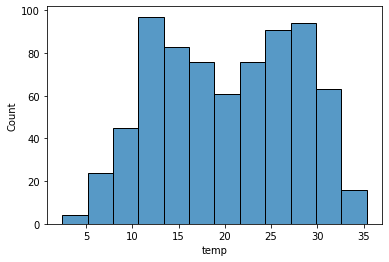

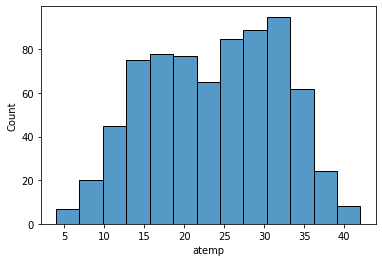

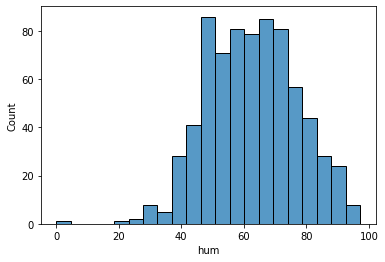

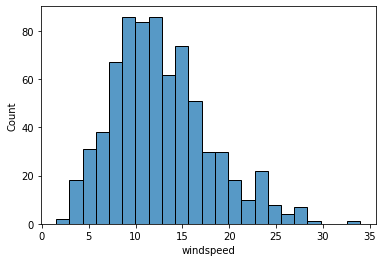

In [32]:
for i in cont_cols:
    sns.histplot(df_new[i])
    plt.show()

In [33]:
##Plotting count plot for categorical variables

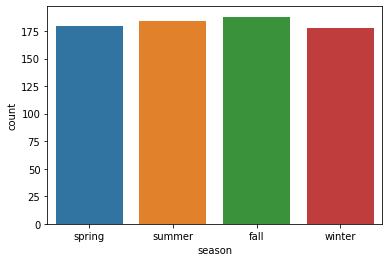

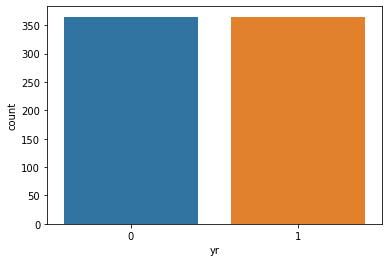

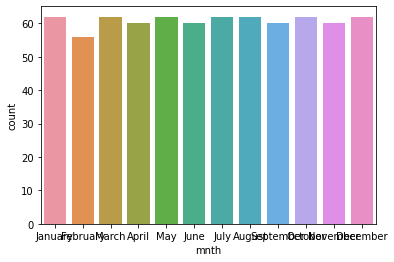

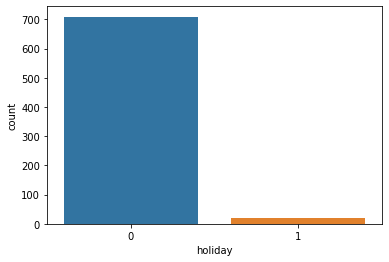

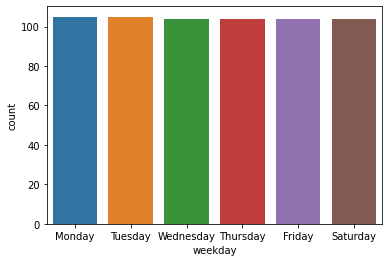

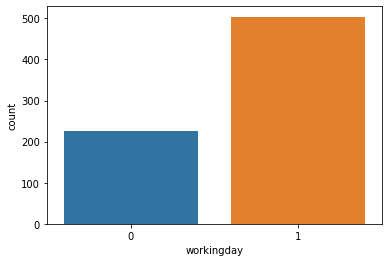

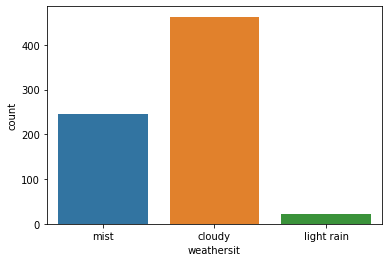

In [34]:
for i in cat_cols:
    sns.countplot(df_new[i])
    plt.show()

__Plot shows that bike riding is done in all seasons. Fall has the highest count of users. In both years bike riding is done constantly.
It seems in January,July,August and December month bike riding is more compare to other months.
Users are using bike mostly on weekdays. Users don't prefer to ride on sunday as there is no data associated with it as per plot. Users mostly ride on cloudy weather rathar than mist and light rain.__

In [35]:
##Plotting box plot for continuous variables

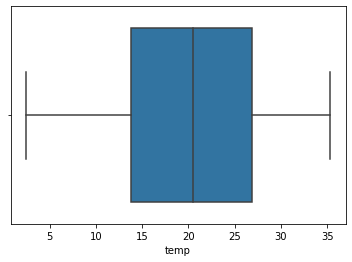

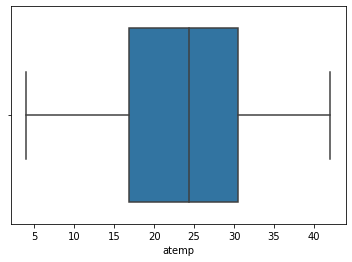

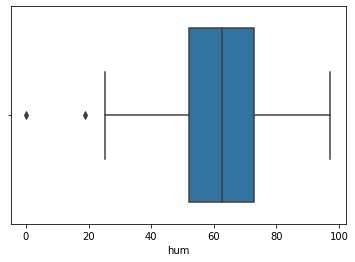

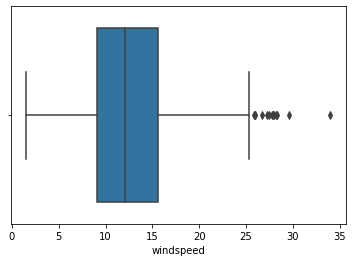

In [36]:
for i in cont_cols:
    sns.boxplot(df_new[i])
    plt.show()

The boxplot indicates that median temperature is 20.
The humidity lies 50 to 70, median is 63. 
Windspeed is mostly near 12.There are few outliers beyond 25 and the maximum is 35.

___Bivariant Analysis___

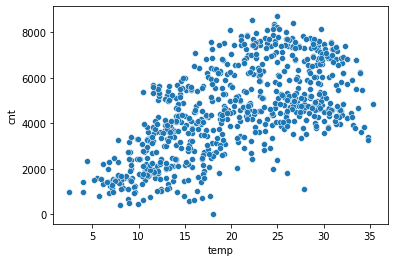

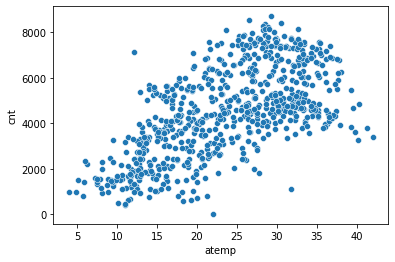

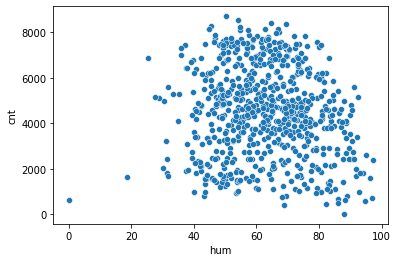

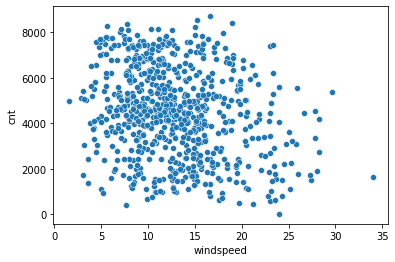

In [37]:
for i in cont_cols:
    sns.scatterplot(x=df_new[i],y=df_new["cnt"])
    plt.show()

The scatter plot of temp clearly indicates a linear relationship between cnt and temp.

In [38]:
##Plotting barplot 

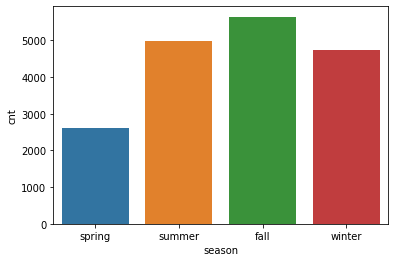

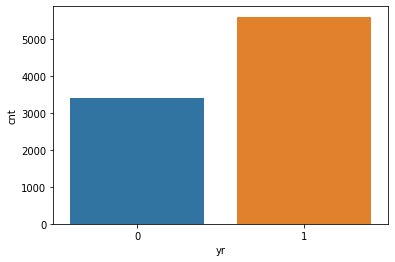

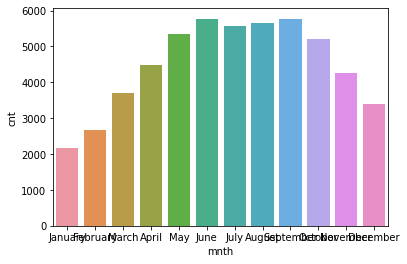

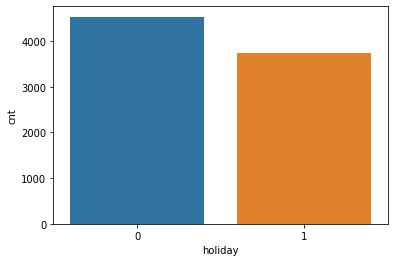

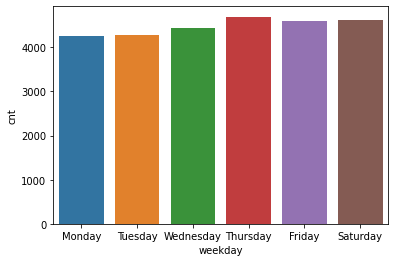

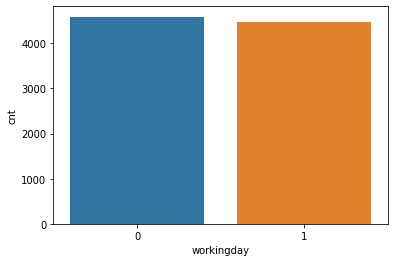

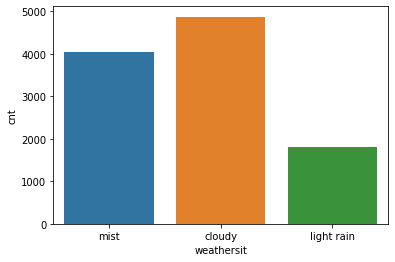

In [39]:
for i in cat_cols:
    sns.barplot(x=df_new[i],y=df_new["cnt"],ci=None)
    plt.show()

Fall has the most user count. In 2019 user increased as compared to 2018.Middle of the year June month shows highest user count.
Working day is most favourable time of users for bike riding.Sunday is not preferred day for bike riding. 
Cloudy whether is preferable weather for user to ride.

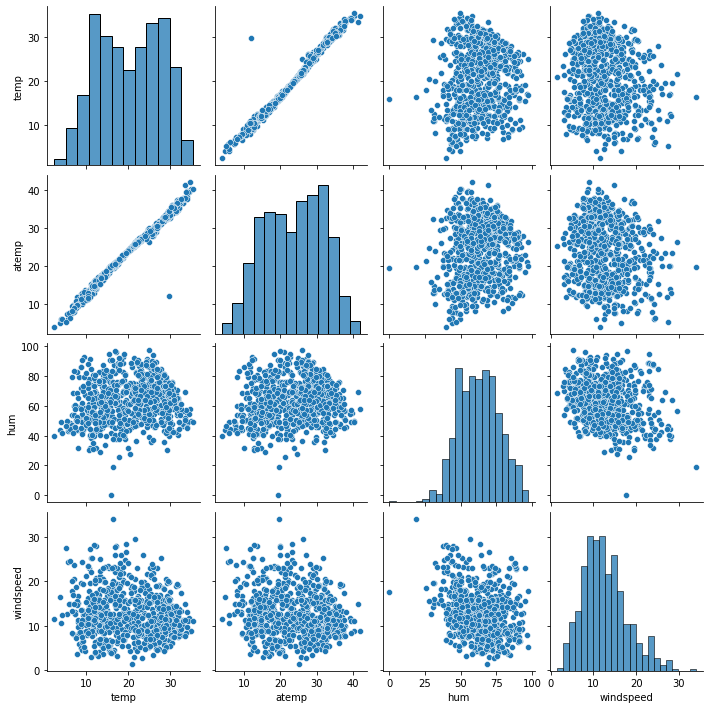

In [40]:
sns.pairplot(df_new[cont_cols])

__Heatmap__

<AxesSubplot:>

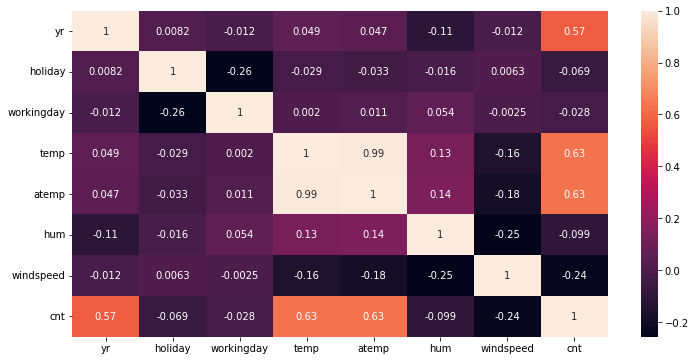

In [41]:
#Analyzing the correlation between variable
plt.figure(figsize=(12,6))
sns.heatmap(df_new.corr(),annot=True)

In [42]:
df_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [43]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,cloudy,9.305237,11.46350,43.6957,12.522300,1600


__Categorical variable to create dummy variables__

The categorical column yr, holiday and working day have only 2 values, hence no need to create dummy variable for this column.

In [44]:
#Creating dummy variables
dum=pd.get_dummies(df_new[["season","mnth","weekday","weathersit"]],drop_first=True)

In [45]:
dum.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light rain,weathersit_mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
dum.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_light rain', 'weathersit_mist'],
      dtype='object')

## Preprocessing - Concatenating dummy columns to the dataframe

In [47]:
data=pd.concat([df_new,dum],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light rain,weathersit_mist
0,spring,0,January,0,Monday,1,mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Tuesday,1,mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,January,0,Wednesday,1,cloudy,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Thursday,1,cloudy,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Friday,1,cloudy,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_light rain', 'weathersit_mist'],
      dtype='object')

In [49]:
## Dropping the actual columns for which dummy variables have been created

In [50]:
data=data.drop(["season","mnth","weekday","weathersit"],axis=1)

In [51]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light rain,weathersit_mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_light rain', 'weathersit_mist'],
      dtype='object')

<AxesSubplot:>

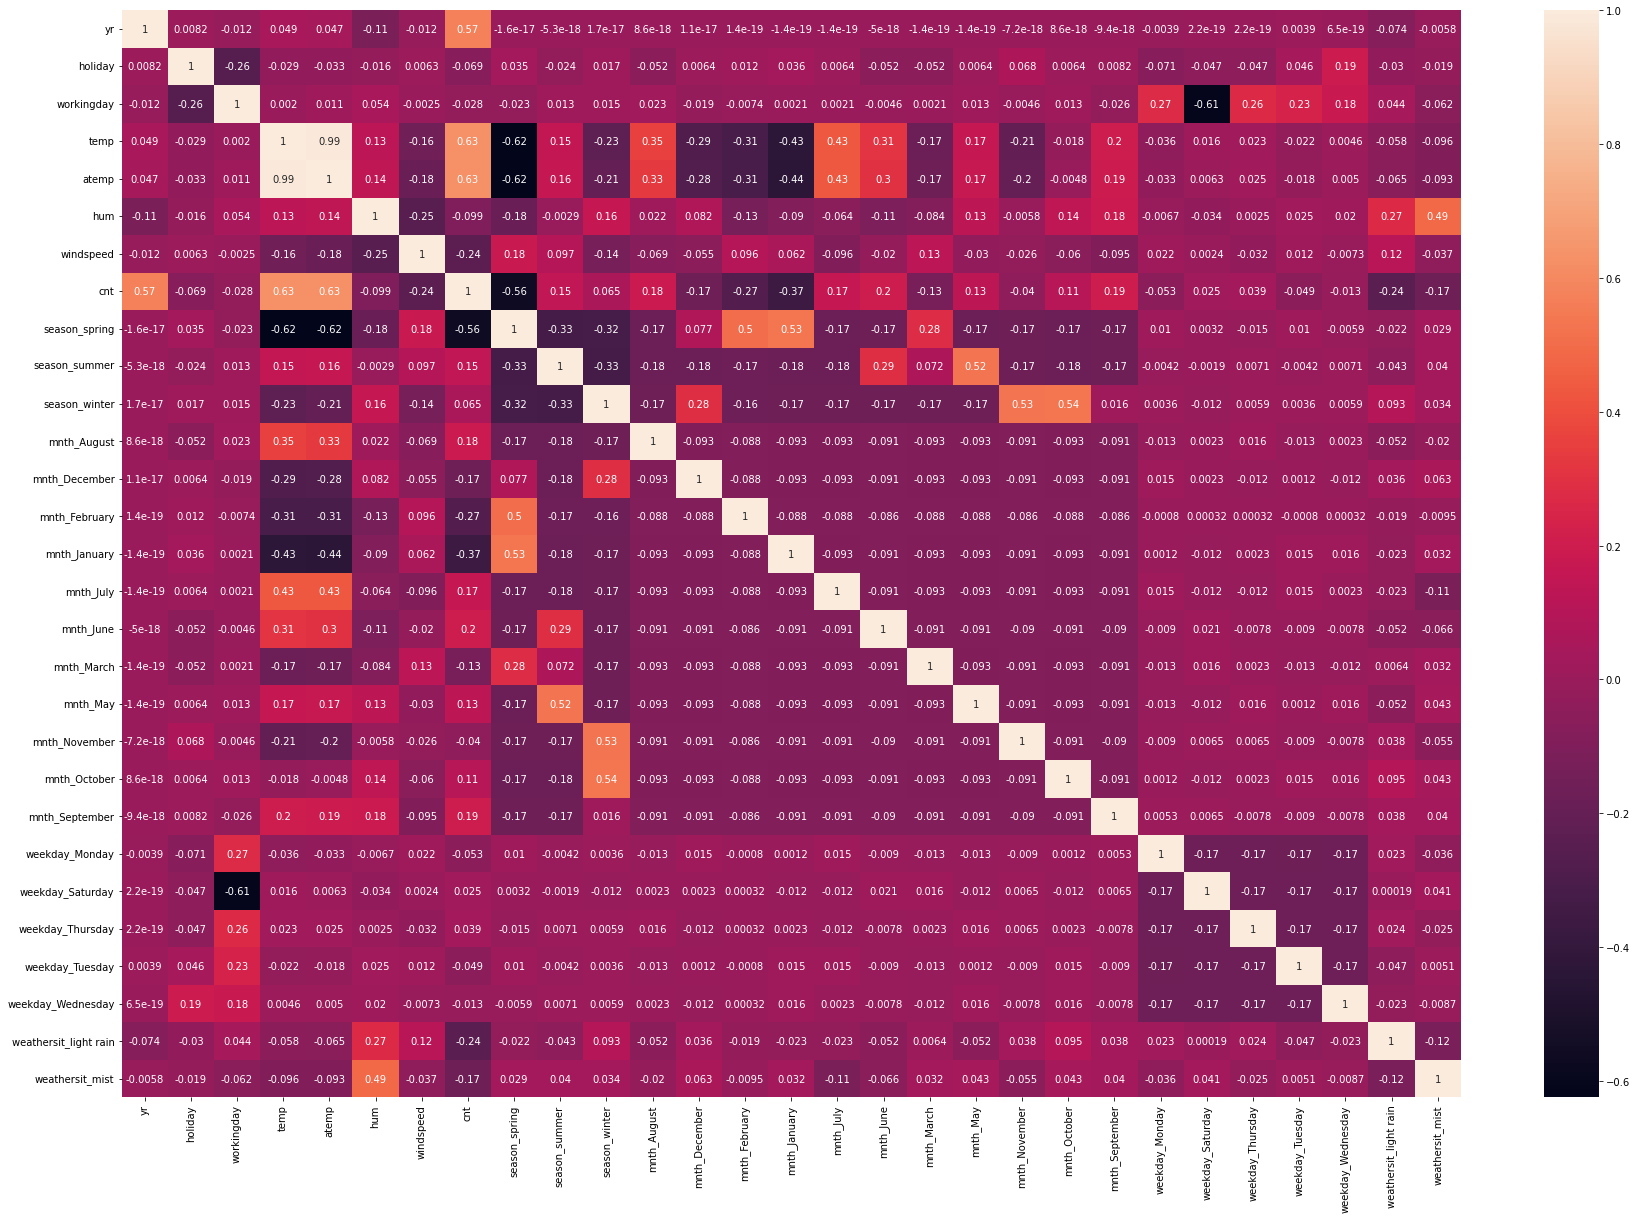

In [53]:
# Analyzing the correlation coefficient after creating dummy variables to know exact columns having high co-relation
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)

The heatmap clearly shows which all variable are multicollinear and which variable have high collinearity with the target variable.
We will refer this map while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## Model Building

In [54]:
X=data.drop(["cnt"],axis=1)
y=data["cnt"]

__Data Split__

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=100)

__Scaling__

In [56]:
# Standarized scaling
xtrain=(xtrain-xtrain.mean())/xtrain.std()

In [57]:
xtrain.shape

(584, 28)

In [58]:
## Feature Selection
## Running RFE with output number of variables 15

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)
selector=selector.fit(xtrain,ytrain)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
        True])

In [59]:
xtrain.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_light rain', 'weathersit_mist'],
      dtype='object')

In [60]:
list(zip(xtrain.columns,selector.support_ ,selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 9),
 ('mnth_December', True, 1),
 ('mnth_February', False, 4),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 10),
 ('mnth_March', False, 13),
 ('mnth_May', False, 7),
 ('mnth_November', True, 1),
 ('mnth_October', False, 11),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 2),
 ('weekday_Saturday', False, 12),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 3),
 ('weekday_Wednesday', False, 6),
 ('weathersit_light rain', True, 1),
 ('weathersit_mist', True, 1)]

In [61]:
col = xtrain.columns[selector.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September', 'weathersit_light rain',
       'weathersit_mist'],
      dtype='object')

In [62]:
 xtrain.columns[~selector.support_]

Index(['workingday', 'atemp', 'mnth_August', 'mnth_February', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_October', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [63]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = xtrain[col]

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [65]:
 # Running the linear model
lm = sm.OLS(ytrain,X_train_rfe).fit()  

In [66]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          9.71e-222
Time:                        16:12:22   Log-Likelihood:                -4702.6
No. Observations:                 584   AIC:                             9437.
Df Residuals:                     568   BIC:                             9507.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4505.26

R-squared value seems good 84.9%
Prob(F-statisctics) also very low, which shows overall it's good model
Let's analyze p-value.Cosidering threshold for p-value as 0.005.
It indicates mnth_January variable having high p-value of 0.013 is insignificant in the presence of other variable.So, can be dropped

In [67]:
X_train_new = X_train_rfe.drop(["mnth_January"], axis = 1)

__Rebuilding the model without mnth_January__

In [68]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [69]:
 # Running the linear model
lm = sm.OLS(ytrain,X_train_lm).fit()  

In [70]:
#Let's see the summary of the re-built linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     225.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.37e-221
Time:                        16:12:22   Log-Likelihood:                -4705.8
No. Observations:                 584   AIC:                             9442.
Df Residuals:                     569   BIC:                             9507.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4505.26

The statistics shows the model is good but p-value for few variable is still high which makes them insignificant,
so will re-build the model after dropping these column. 

Before that let's see VIF of columns.

In [71]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_spring,5.38
3,temp,3.96
8,season_winter,3.58
7,season_summer,2.68
4,hum,1.95
11,mnth_November,1.65
14,weathersit_mist,1.60
10,mnth_July,1.51
9,mnth_December,1.36
12,mnth_September,1.32


__Rebuilding the model again after dropping column mnth_December__

In [72]:
X_train_new3 = X_train_new.drop(["mnth_December"], axis = 1)

In [73]:
# Adding a constant variable  
X_train_lm3 = sm.add_constant(X_train_new3)

In [74]:
 # Running the linear model
lm3 = sm.OLS(ytrain,X_train_lm3).fit()  

In [75]:
#Let's see the summary of the re-built linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     241.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.12e-221
Time:                        16:12:22   Log-Likelihood:                -4708.4
No. Observations:                 584   AIC:                             9445.
Df Residuals:                     570   BIC:                             9506.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4505.26

The R-squared value still seems good.Overall model is good but mnth_November column shows high p-value which indicates insignificance of it.

In [76]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_spring,5.27
3,temp,3.66
8,season_winter,3.52
7,season_summer,2.63
4,hum,1.93
13,weathersit_mist,1.59
9,mnth_July,1.51
10,mnth_November,1.45
11,mnth_September,1.30
12,weathersit_light rain,1.24


The season_spring shows high VIF value but the p-value of the column is under the threshold 0.005

__Rebuilding the model again after dropping column mnth_November__

In [77]:
X_train_new4 = X_train_new3.drop(["mnth_November"], axis = 1)

In [78]:
# Adding a constant variable  
X_train_lm4 = sm.add_constant(X_train_new4)

In [79]:
 # Running the linear model
lm4 = sm.OLS(ytrain,X_train_lm4).fit()  

In [80]:
#Let's see the summary of the re-built linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     259.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          6.27e-222
Time:                        16:12:22   Log-Likelihood:                -4710.7
No. Observations:                 584   AIC:                             9447.
Df Residuals:                     571   BIC:                             9504.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4505.26

New model lm4 seems good as per adjuated R-squared and prob(F-statistics) value.
The p-value of all variable indicates they are significant.

In [81]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_spring,5.11
3,temp,3.55
8,season_winter,3.39
7,season_summer,2.59
4,hum,1.93
12,weathersit_mist,1.59
9,mnth_July,1.51
10,mnth_September,1.28
11,weathersit_light rain,1.24
5,windspeed,1.19


The VIF for the new model still indicates season_spring column with slightly above threshold of 5.
Let's drop this column and build the model again.

__Rebuilding the model again after dropping column season_spring__

In [82]:
X_train_new5 = X_train_new4.drop(["season_spring"], axis = 1)

In [83]:
# Adding a constant variable  
X_train_lm5 = sm.add_constant(X_train_new5)

In [84]:
 # Running the linear model
lm5 = sm.OLS(ytrain,X_train_lm5).fit()  

In [85]:
#Let's see the summary of the re-built linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     277.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.98e-221
Time:                        16:12:23   Log-Likelihood:                -4715.5
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     572   BIC:                             9508.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4505.26

In [86]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,1.91
3,temp,1.60
11,weathersit_mist,1.58
8,mnth_July,1.45
6,season_summer,1.35
7,season_winter,1.27
10,weathersit_light rain,1.24
9,mnth_September,1.19
5,windspeed,1.18
1,yr,1.03


The VIF seems quite good for all columns. 
But mnth_July column shows high p-value which indicates insignificance of it.

__Rebuilding the model again after dropping column mnth_July__

In [87]:
X_train_new6 = X_train_new5.drop(["mnth_July"], axis = 1)

In [88]:
# Adding a constant variable  
X_train_lm6 = sm.add_constant(X_train_new6)

In [89]:
 # Running the linear model
lm6 = sm.OLS(ytrain,X_train_lm6).fit()  

In [90]:
#Let's see the summary of the re-built linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     301.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          8.52e-221
Time:                        16:12:23   Log-Likelihood:                -4719.3
No. Observations:                 584   AIC:                             9461.
Df Residuals:                     573   BIC:                             9509.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4505.26

In [91]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,1.90
10,weathersit_mist,1.58
3,temp,1.26
7,season_winter,1.23
9,weathersit_light rain,1.23
6,season_summer,1.20
5,windspeed,1.18
8,mnth_September,1.11
1,yr,1.03
2,holiday,1.01


Finally, after multiple iteration we landed with good model having Adj R-squared 83.7 percentage. Prob(F) also very low which indicates
 good model. Also the VIF of all the selected variable is low, so there is no multicolinearity.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression),
let us plot the histogram of the error terms and see what it looks like.

In [92]:
y_train_cnt = lm6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

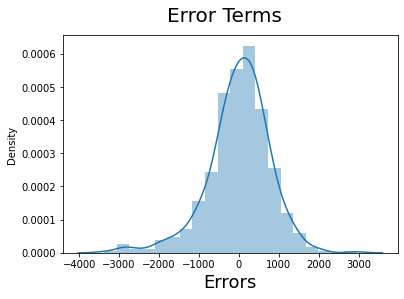

In [93]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((ytrain - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The above histogram clearly indicates that the error terms are normally distributed and mean is 0.

## Model Evaluation - making Predictions

__Applying the scaling on the test sets__

In [94]:
num_vars = ['yr', 'holiday', 'temp', 'hum', 'windspeed','season_summer','season_winter','mnth_September',
            'weathersit_light rain','weathersit_mist']



In [95]:
## Predictions on Test Data
xtest=(xtest-xtest.mean())/xtest.std()

In [96]:
xtest=xtest[num_vars]
xtest=sm.add_constant(xtest)


In [97]:
xtest.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_September', 'weathersit_light rain',
       'weathersit_mist'],
      dtype='object')

In [98]:
predicted_value = lm6.predict(xtest)

__Plotting scatter plot for actual and predicted value of test data to understand the spread__

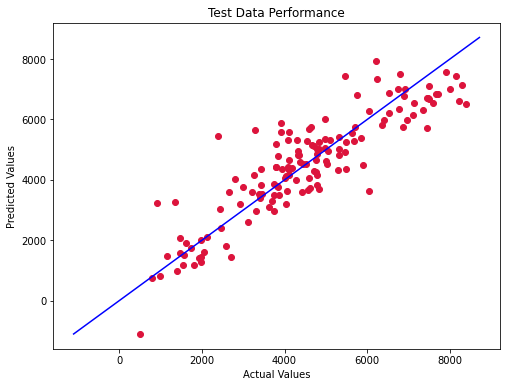

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(ytest, predicted_value, c='crimson')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Data Performance")
p1 = max(max(predicted_value), max(ytrain))
p2 = min(min(predicted_value), min(ytrain))
plt.plot([p1, p2], [p1, p2], 'b-')

## Calculating R-squared value of prediction on test data

In [100]:
from sklearn.metrics import r2_score
r2_score(ytest, predicted_value)

0.7776434589020312

__The R-squared value is 77.76 percentage for test data which is near to R-squared value 84 percentage on training data.__

___Adjusted R-squared___

The value of R-square from above is 0.777

In [101]:
r2 = 0.777

In [102]:
# Get the shape of xtest
xtest.shape

(146, 11)

In [103]:
# n is number of rows in X

n = xtest.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = xtest.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7586940298507463

__Variable params for the linear regression equation__

In [104]:
lm6.params

const                    4505.267123
yr                        978.162031
holiday                  -150.898964
temp                     1153.048000
hum                      -215.102064
windspeed                -264.797196
season_summer             346.274443
season_winter             550.030740
mnth_September            236.287936
weathersit_light rain    -340.697456
weathersit_mist          -205.039348
dtype: float64

Y = 978 * yr - 150 * holiday + 1153.04 * temp - 215.10 * hum - 264.79 * windspeed + 346.27 * season_summer + 550 * season_winter + 236.28 * mnth_September - 340.69 * weathersit_light rain - 205.039 * weathersit_mist


__Above is the linear regression equation for Bike Sharing Sytem.The variable which create impact on user count of bike are :
    yr, temp, season_summer , season_winter, mnth_Septembar having positive correlation with user count while holiday, 
    hum,windspeed,weathersit_light rain ,weathersit_mist having negative correalation with user count.__

__Interpretation of Coefficients:__
yr: A coefficient value of 978 indicated that a unit increase in yr variable, increases the bike hire numbers by 978 units.

holiday: A coefficient value of -150 indicated that, a unit increase in holiday variable, decreases the bike hire numbers by 150 units.

temp: A coefficient value of 1153.04 indicated that a unit increase in temp variable, increases the bike hire numbers by 1153 units.

hum: A coefficient value of -215.10 indicated that a unit increase in hum variable decreases the bike hire numbers by 215 units.

season_summer: A coefficient value of 346.27 indicated that, a unit increase in season_summer variable increases the bike hire numbers by 346.27 units.

season_winter: A coefficient value of 550.03 indicated that, a unit increase in season_winter variable increases the bike hire numbers by 550.03 units.

mnth_September: A coefficient value of 236.28 indicated thaat, a unit increase in mnth_September variable increases the bike hire numbers by 236.28 units.

weathersit_light rain: A coefficient value of -340.69 indicated that, a unit increase in weathersit_light variable decreases the bike hire numbers by 340.69 units.

weathersit_mist: A coefficient value of -205.03 indicated that , a unit increase in weathersit_mist variable decreases the bike hire numbers by 205.039 units.

const: The Constant value of 4505.26 indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still be 4505.26 units.

We have tried to keep the model simple but also with better prediction performance. 
Out of 29 columns, we have built the model using 10 column only, but at the same time maintaining the prediction performance.

__Final Result Comparison__


Train data R^2 :0.84
Train data Adjusted R^2 :0.837
Test data R^2 :0.777
Test data Adjusted R^2 :0.758
This seems to be a really good model that can well 'Generalize' various datasets.

__Hypothesis testing states that:__

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0


__lr6 model coefficient values__

const                     4505.267123

yr                        978.162031

holiday                  -150.898964

temp                     1153.048000


hum                      -215.102064

windspeed                -264.797196

season_summer             346.274443

season_winter             550.030740

mnth_September            236.287936

weathersit_light rain    -340.697456

weathersit_mist          -205.039348

From the lr6 model summary, it is clear that all our coefficients are not equal to zero, so we can REJECT the NULL HYPOTHESIS